In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="sales_db",
    user="amanattar",  # Change to your PostgreSQL username
    password="amanattar",  # Change to your PostgreSQL password
    host="localhost",
    port="5432"
)


In [2]:
query = "SELECT * FROM sales LIMIT 5;"
df = pd.read_sql(query, conn)
df.head()

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/746144854.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. Monthly Revenue Trend

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/2184694814.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenue = pd.read_sql(query, conn)


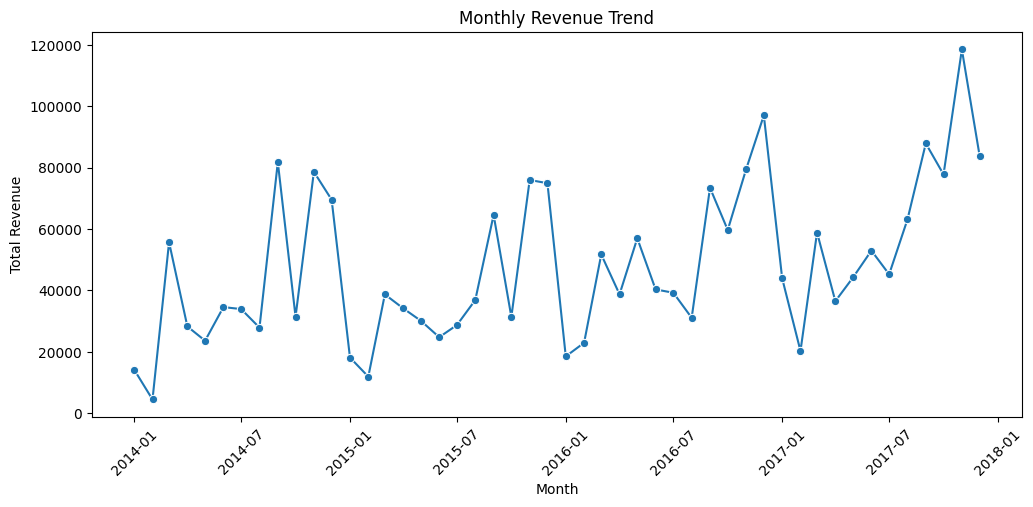

In [3]:
query = """
    SELECT DATE_TRUNC('month', order_date) AS month, SUM(sales) AS total_revenue
    FROM sales
    GROUP BY month
    ORDER BY month;
"""
df_revenue = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=df_revenue, x="month", y="total_revenue", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# 2. Top 15 Best-Selling Products

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/3758458620.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_products = pd.read_sql(query, conn)
/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/3758458620.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_products, y="product_name", x="total_sales", palette="viridis")


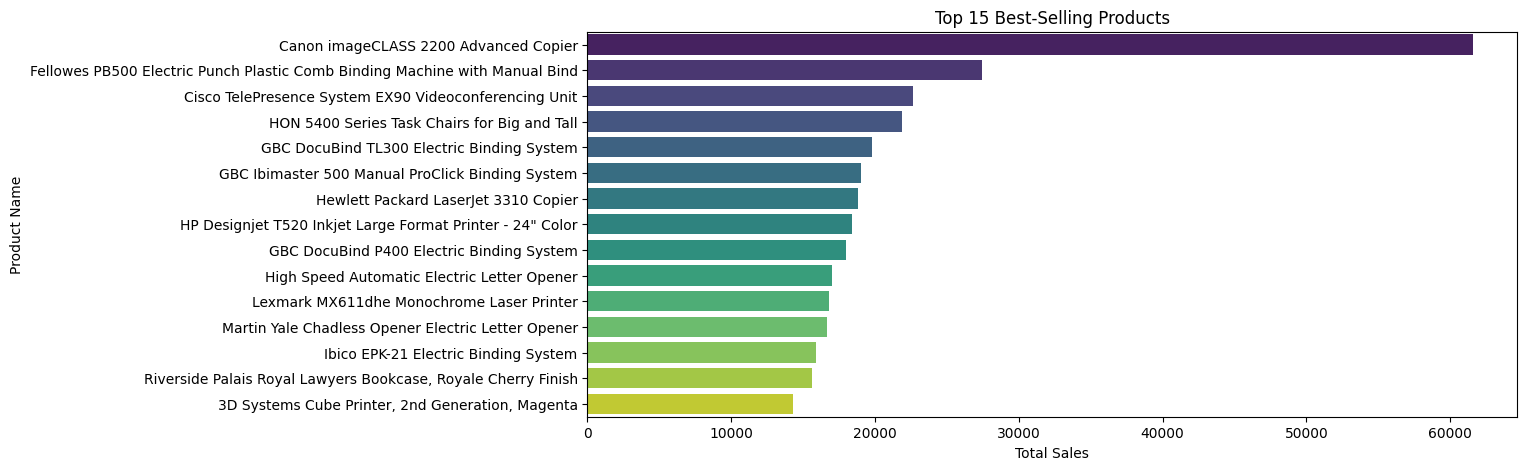

In [5]:
query = """
    SELECT product_name, SUM(sales) AS total_sales
    FROM sales
    GROUP BY product_name
    ORDER BY total_sales DESC
    LIMIT 15;
"""
df_top_products = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=df_top_products, y="product_name", x="total_sales", palette="viridis")
plt.title("Top 15 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

# 3. Customer Retention (New vs. Returning Customers)

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/4284236409.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql(query, conn)


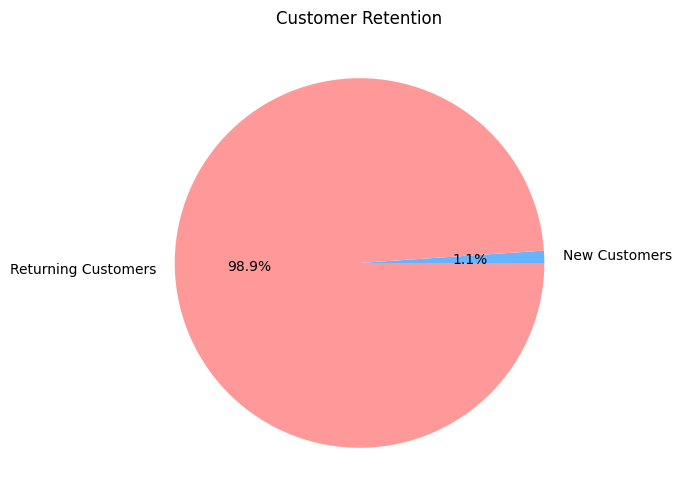

In [11]:
query = """
    SELECT customer_id, COUNT(order_id) AS order_count
    FROM sales
    GROUP BY customer_id;
"""
df_customers = pd.read_sql(query, conn)

# Count new vs returning customers
new_customers = (df_customers['order_count'] == 1).sum()
returning_customers = (df_customers['order_count'] > 10).sum()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie([new_customers, returning_customers], labels=["New Customers", "Returning Customers"], autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"])
plt.title("Customer Retention")
plt.show()


# 4. Profit vs. Discount Analysis

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/1628558912.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_discount = pd.read_sql(query, conn)


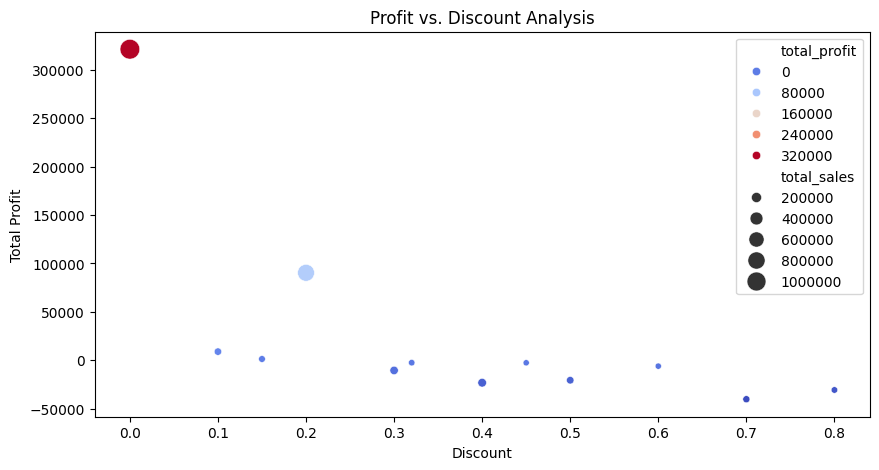

In [12]:
query = """
    SELECT discount, SUM(sales) AS total_sales, SUM(profit) AS total_profit
    FROM sales
    GROUP BY discount
    ORDER BY discount;
"""
df_discount = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_discount, x="discount", y="total_profit", size="total_sales", sizes=(20,200), hue="total_profit", palette="coolwarm")
plt.title("Profit vs. Discount Analysis")
plt.xlabel("Discount")
plt.ylabel("Total Profit")
plt.show()

# 5. Regional Sales Performance

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/910486115.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_region = pd.read_sql(query, conn)
/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/910486115.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_region, x="region", y="total_sales", palette="coolwarm")


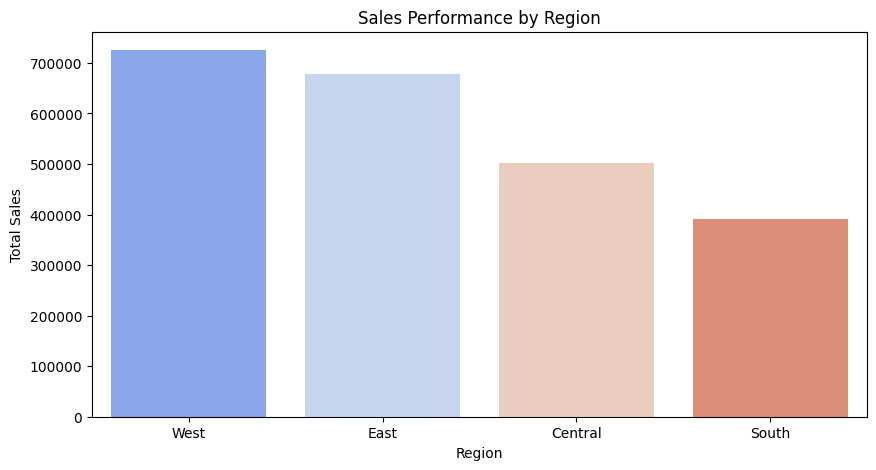

In [13]:
query = """
    SELECT region, SUM(sales) AS total_sales
    FROM sales
    GROUP BY region
    ORDER BY total_sales DESC;
"""
df_region = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=df_region, x="region", y="total_sales", palette="coolwarm")
plt.title("Sales Performance by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# 6. Sales Contribution by Category

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/1783850133.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_category = pd.read_sql(query, conn)


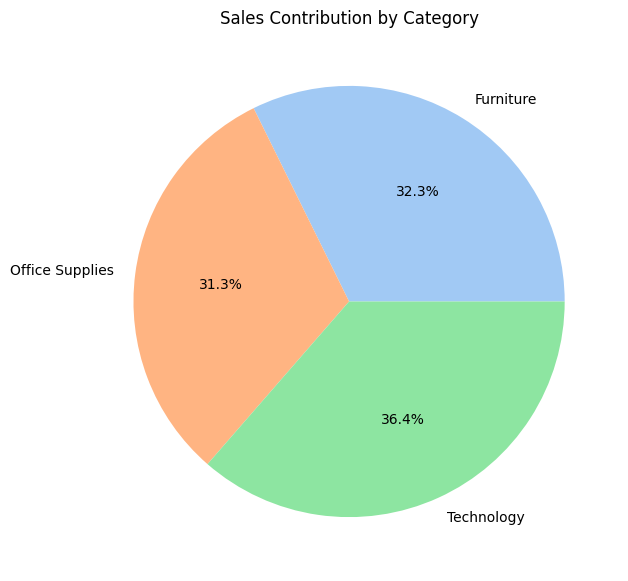

In [14]:
query = """
    SELECT category, SUM(sales) AS total_sales
    FROM sales
    GROUP BY category;
"""
df_category = pd.read_sql(query, conn)

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(df_category["total_sales"], labels=df_category["category"], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Sales Contribution by Category")
plt.show()


# 7. Most Profitable Customers

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/702596863.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql(query, conn)
/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/702596863.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_customers, y="customer_name", x="total_profit", palette="magma")


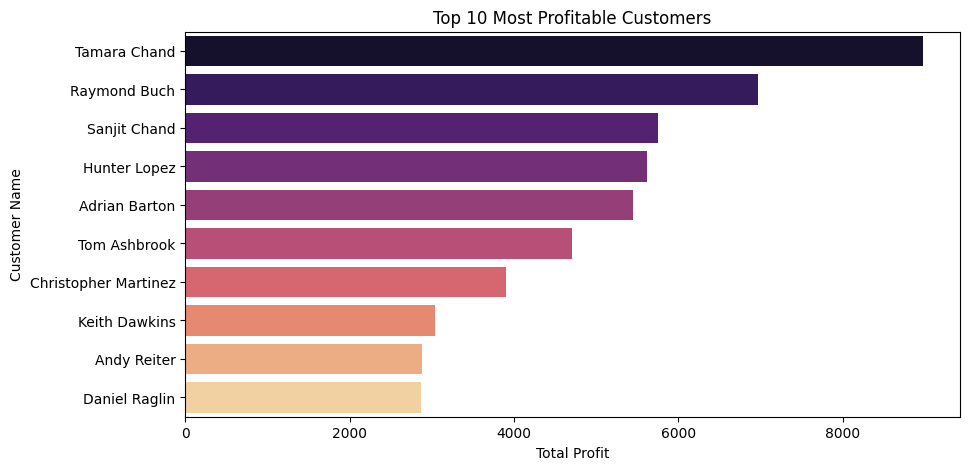

In [15]:
query = """
    SELECT customer_name, SUM(profit) AS total_profit
    FROM sales
    GROUP BY customer_name
    ORDER BY total_profit DESC
    LIMIT 10;
"""
df_customers = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=df_customers, y="customer_name", x="total_profit", palette="magma")
plt.title("Top 10 Most Profitable Customers")
plt.xlabel("Total Profit")
plt.ylabel("Customer Name")
plt.show()


# Marketing Analysis

## 1. Customer Churn Analysis (At-Risk Customers)
Goal: Identify customers who haven't purchased recently.

Marketing Use Case:
- Retarget customers with personalized emails & discounts.
- Offer win-back promotions for re-engagement.

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/3180083446.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn = pd.read_sql(query, conn)


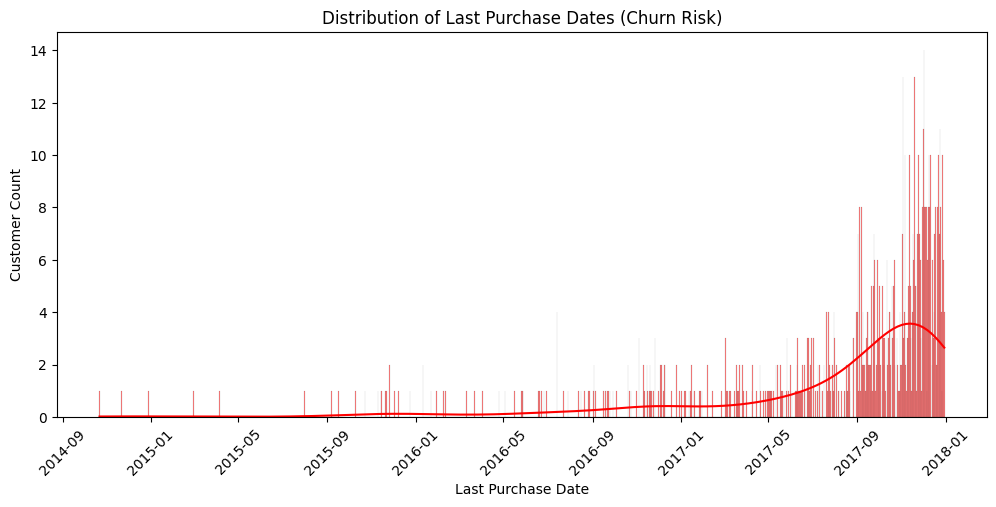

In [18]:
query = """
    SELECT customer_id, customer_name, MAX(order_date) AS last_purchase_date
    FROM sales
    GROUP BY customer_id, customer_name
    HAVING MAX(order_date) < NOW() - INTERVAL '6 months'
    ORDER BY last_purchase_date ASC;
"""
df_churn = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(12,5))
sns.histplot(df_churn["last_purchase_date"], bins=20, kde=True, color="red")
plt.title("Distribution of Last Purchase Dates (Churn Risk)")
plt.xlabel("Last Purchase Date")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()


## 2. High-Value Customers Based on Average Order Value (AOV)
Goal: Find customers who spend the most per order.

Marketing Use Case:
- Offer VIP rewards to high spenders.
- Target them for premium product upselling.

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/1729171459.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_aov = pd.read_sql(query, conn)
/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/1729171459.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_aov, x="avg_order_value", y="customer_name", palette="magma")


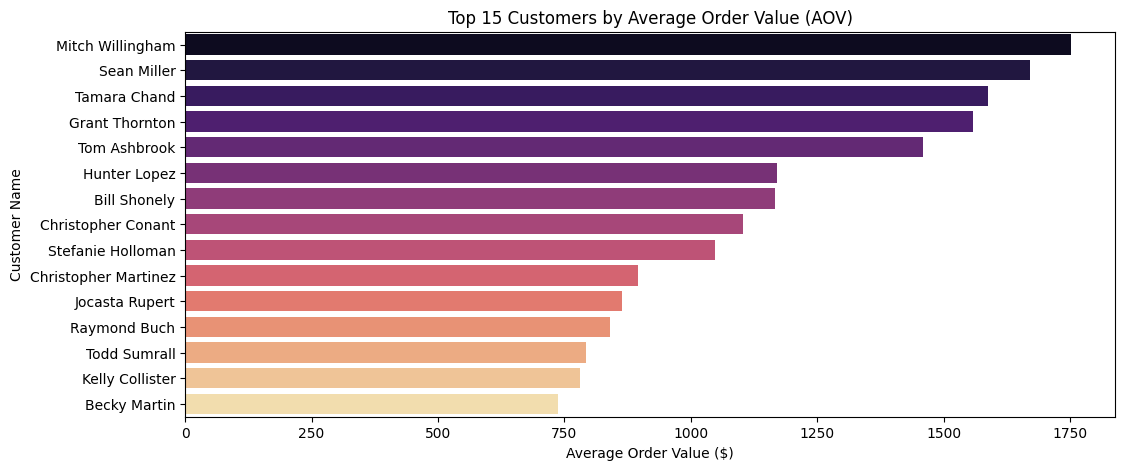

In [19]:
query = """
    SELECT customer_id, customer_name, SUM(sales)/COUNT(order_id) AS avg_order_value
    FROM sales
    GROUP BY customer_id, customer_name
    ORDER BY avg_order_value DESC
    LIMIT 15;
"""
df_aov = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=df_aov, x="avg_order_value", y="customer_name", palette="magma")
plt.title("Top 15 Customers by Average Order Value (AOV)")
plt.xlabel("Average Order Value ($)")
plt.ylabel("Customer Name")
plt.show()


## 3. Cross-Selling Opportunities (Customers Buying Multiple Categories)
Goal: Identify customers who buy from multiple categories.

Marketing Use Case:
- Create personalized recommendations.
- Bundle complementary products for promotions.

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/3260615756.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cross_sell = pd.read_sql(query, conn)
/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/3260615756.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cross_sell, x="category_count", y="customer_name", palette="coolwarm")


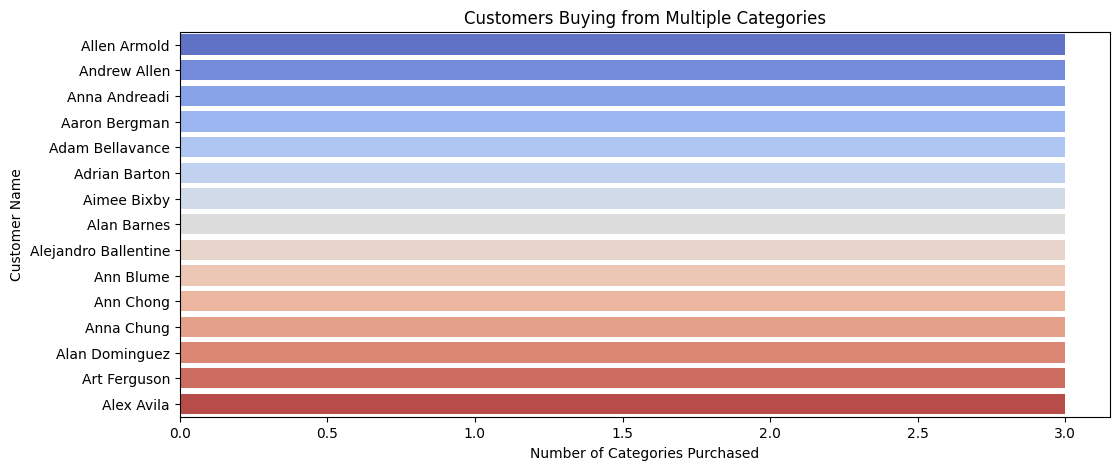

In [22]:
query = """
    SELECT customer_id, customer_name, COUNT(DISTINCT category) AS category_count
    FROM sales
    GROUP BY customer_id, customer_name
    HAVING COUNT(DISTINCT category) > 2
    ORDER BY category_count DESC
    LIMIT 15;
"""
df_cross_sell = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=df_cross_sell, x="category_count", y="customer_name", palette="coolwarm")
plt.title("Customers Buying from Multiple Categories")
plt.xlabel("Number of Categories Purchased")
plt.ylabel("Customer Name")
plt.show()

## 4. Discount Effectiveness: Do Discounts Increase Sales?
Goal: Analyze whether discounts increase revenue or reduce profit.

Marketing Use Case:
- Optimize discount strategy for profitability.
- Identify the best discount percentage for maximum revenue.

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/4287348941.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_discount = pd.read_sql(query, conn)


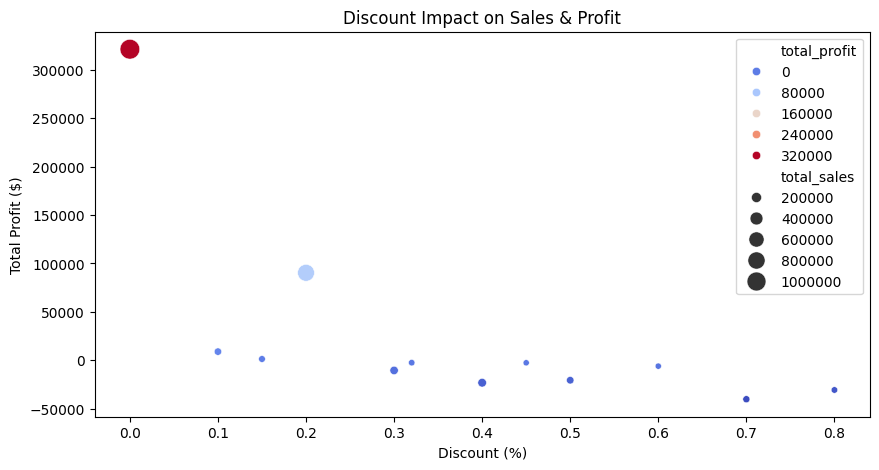

In [24]:
query = """
    SELECT discount, SUM(sales) AS total_sales, SUM(profit) AS total_profit
    FROM sales
    GROUP BY discount
    ORDER BY discount;
"""
df_discount = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_discount, x="discount", y="total_profit", size="total_sales", sizes=(20,200), hue="total_profit", palette="coolwarm")
plt.title("Discount Impact on Sales & Profit")
plt.xlabel("Discount (%)")
plt.ylabel("Total Profit ($)")
plt.show()

## 5. Predicting Next Purchase Date (Customer Buying Cycle)
Goal: Predict when a customer will likely buy again.

Marketing Use Case:
- Send reminder emails before their expected purchase date.
- Create subscription offers for repeat buyers.

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/2964881991.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_purchase_cycle = pd.read_sql(query, conn)
/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_15781/2964881991.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_purchase_cycle, x="avg_days_between_purchases", y="customer_id", palette="viridis")


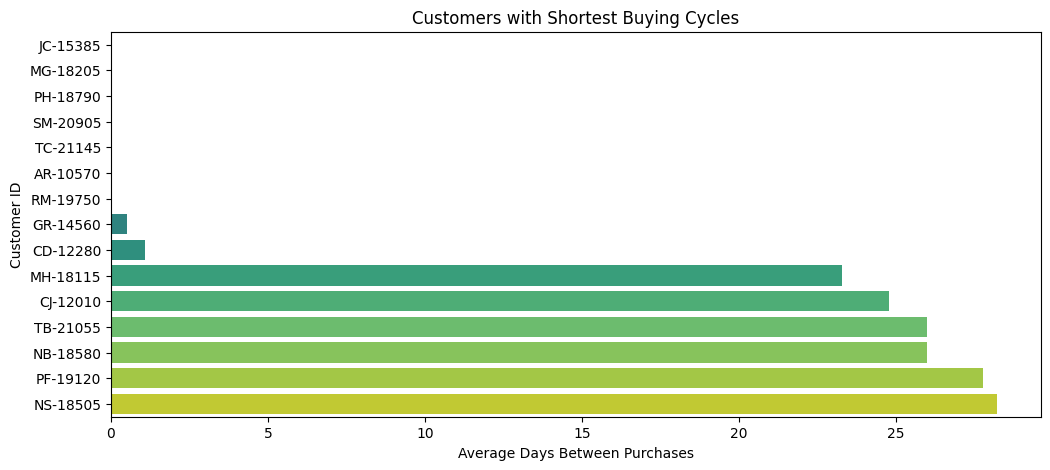

In [25]:
query = """
    WITH purchase_intervals AS (
        SELECT customer_id, order_date - LAG(order_date) OVER (PARTITION BY customer_id ORDER BY order_date) AS interval_days
        FROM sales
    )
    SELECT customer_id, AVG(interval_days) AS avg_days_between_purchases
    FROM purchase_intervals
    GROUP BY customer_id
    HAVING AVG(interval_days) IS NOT NULL
    ORDER BY avg_days_between_purchases ASC
    LIMIT 15;
"""
df_purchase_cycle = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=df_purchase_cycle, x="avg_days_between_purchases", y="customer_id", palette="viridis")
plt.title("Customers with Shortest Buying Cycles")
plt.xlabel("Average Days Between Purchases")
plt.ylabel("Customer ID")
plt.show()
